In [12]:
import pandas as pd 

In [13]:
microbes = pd.read_csv('data/microbes.csv')
microbes.set_index('id', inplace=True)
microbes.head()


,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
id,,,,,,,,,,,,,,,,,,,,,
0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,10.90,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,19.20,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,10.20,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,10.70,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,1.22,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [14]:
max(microbes["microorganisms"].value_counts()/len(microbes))

0.2430635175418482

In [15]:
microbes["microorganisms"].unique()

array(['Spirogyra', 'Volvox', 'Pithophora', 'Yeast', 'Raizopus',
       'Penicillum', 'Aspergillus sp', 'Protozoa', 'Diatom', 'Ulothrix'],
      dtype=object)

In [16]:
from sklearn.model_selection import train_test_split

X = microbes.drop('microorganisms', axis=1)
y = microbes['microorganisms']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))



/Users/Jeremy/.pyenv/versions/Artefact/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                precision    recall  f1-score   support

Aspergillus sp       0.38      0.47      0.42       753
        Diatom       0.38      0.22      0.28       345
    Penicillum       0.00      0.00      0.00       235
    Pithophora       0.63      0.53      0.58       280
      Protozoa       0.44      0.39      0.42       770
      Raizopus       0.64      0.72      0.68       534
     Spirogyra       0.00      0.00      0.00       112
      Ulothrix       0.46      0.61      0.52      1497
        Volvox       0.49      0.51      0.50       844
         Yeast       0.55      0.42      0.48       736

      accuracy                           0.48      6106
     macro avg       0.40      0.39      0.39      6106
  weighted avg       0.46      0.48      0.46      6106



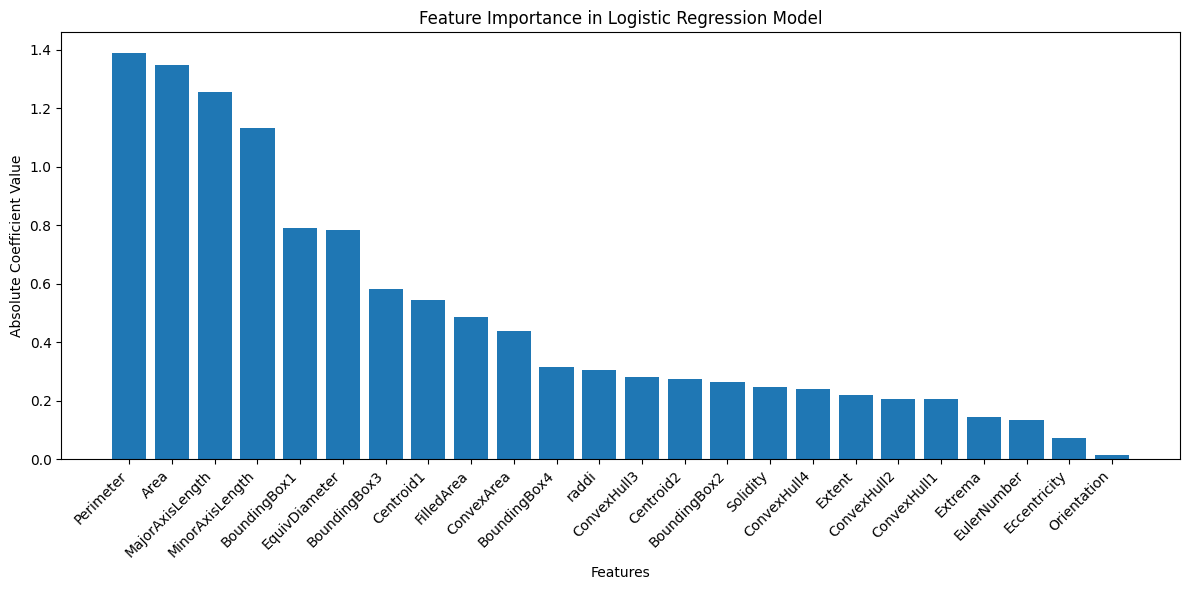


Top 10 Most Important Features:
            feature  importance
18        Perimeter    1.389296
22             Area    1.346116
16  MajorAxisLength    1.255665
17  MinorAxisLength    1.130639
8      BoundingBox1    0.789567
2     EquivDiameter    0.783005
10     BoundingBox3    0.583063
20        Centroid1    0.545190
4        FilledArea    0.487035
19       ConvexArea    0.438961


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = np.abs(model.coef_).mean(axis=0)  # Average across all classes for multiclass
feature_names = X.columns

# Create DataFrame of feature importance
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

In [19]:
X = X[importance_df.feature[:4].values]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

/Users/Jeremy/.pyenv/versions/Artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

Aspergillus sp       0.27      0.24      0.26       753
        Diatom       0.24      0.04      0.07       345
    Penicillum       0.00      0.00      0.00       235
    Pithophora       0.60      0.34      0.44       280
      Protozoa       0.23      0.06      0.09       770
      Raizopus       0.47      0.81      0.59       534
     Spirogyra       0.00      0.00      0.00       112
      Ulothrix       0.34      0.69      0.45      1497
        Volvox       0.29      0.28      0.29       844
         Yeast       0.55      0.17      0.26       736

      accuracy                           0.35      6106
     macro avg       0.30      0.26      0.24      6106
  weighted avg       0.33      0.35      0.30      6106



/Users/Jeremy/.pyenv/versions/Artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Jeremy/.pyenv/versions/Artefact/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

Aspergillus sp       0.98      0.97      0.97       753
        Diatom       0.97      1.00      0.99       345
    Penicillum       1.00      1.00      1.00       235
    Pithophora       0.97      0.93      0.95       280
      Protozoa       0.99      1.00      0.99       770
      Raizopus       1.00      1.00      1.00       534
     Spirogyra       1.00      0.79      0.88       112
      Ulothrix       0.99      0.99      0.99      1497
        Volvox       0.98      1.00      0.99       844
         Yeast       0.99      0.99      0.99       736

      accuracy                           0.99      6106
     macro avg       0.99      0.97      0.98      6106
  weighted avg       0.99      0.99      0.99      6106



In [23]:
import pickle

pickle.dump(model, open('models/microbe_model.pkl', 'wb'))

In [24]:
import os
workdir = os.getcwd()
